# Loan Data Analysis
## by Erfan Asnaashari

## Investigation Overview

This presentation aims at conveying the main findings obtained from the exploration analysis on a loan dataset with a variety of variables. The key findings are presented as either bivariate or multivariate plots showing the relationships between main and supportive variables.

## Dataset Overview

The original loan dataset consists of 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. After conducting the wrangling process, 97671 loans were remained and 12 variables were selected for this study.
The focus here is on two main features of any loan; loan amount and the interest rate as well as some other important features that can greatly affect the two main variables. The features depicted in this presentation are:

__Main variables__
1. Loan amount
2. Interest rate (borrower rate)

__Supportive variables__
3. Income range
4. Employment status
5. Employment duration
6. Loan term (duration)
7. Loan status
8. Lower credit score
9. Debt-to-income ratio


In [13]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [14]:
# load in the dataset into a pandas dataframe
df= pd.read_csv('clean_loan_data.csv')

## 1. Credit score vs. Interest rate
As expected, credit score affects the rate of interest on the borrower's loan. As depicted in this scatter plot, it is very unlikely to receive a loan with less than 15% interest rate if your lower credit score is less than 620. The majority of those applicants with the lower credit score of above 850 are entitled to low interest rate (5%-10%) loans. 

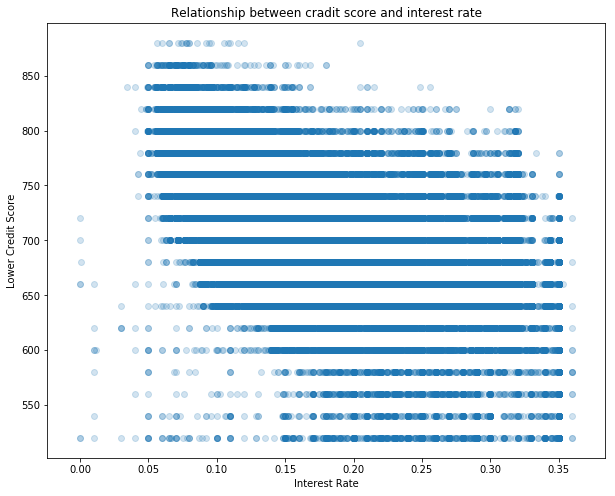

In [15]:
plt.figure(figsize= [10, 8])
plt.scatter(data= df, y= 'CreditScoreRangeLower', x= 'BorrowerRate', alpha= 1/5);
plt.xlabel('Interest Rate');
plt.ylabel('Lower Credit Score');
plt.title('Relationship between cradit score and interest rate');

## 2. Debt-to-income ratio vs. loan amount
It is clear from the heatmap that debt-to-income ratio has tangible influence on the amount of loan one can borrow. The figure shows that it is impossible to get more than \\$27,500 loan if your debt-to-income ratio is above 150\%. Moreover, with debt-to-income ratio of 200\% and above, it would be quite difficult for a borrower to receive more than \\$17,500 loan.

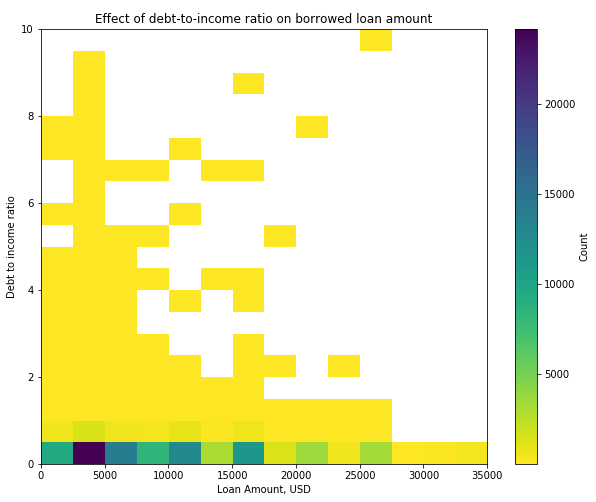

In [16]:
plt.figure(figsize= [10, 8])
y_bins= np.arange(0, 10.01+ 0.5, 0.5)
x_bins= np.arange(0, 35000+ 2500, 2500)
plt.hist2d(data= df, x= 'LoanOriginalAmount', y= 'DebtToIncomeRatio', cmin= 1, cmap= 'viridis_r', bins= [x_bins, y_bins]);
plt.colorbar(label= 'Count');
plt.xlabel('Loan Amount, USD');
plt.ylabel('Debt to income ratio');
plt.title('Effect of debt-to-income ratio on borrowed loan amount');
plt.ylim(0,10); # Not displaying outliers

## 3. Interest rate vs. Loan status
As depicted in this violin plot, there is a high density of interest rates of more than 20% and the median interest rate is also higher than 20% for defaulted, chargedoff and past due types of loan status. On the other hand, this density is considerably smaller for completed loans or those in the final payment stage. This suggests that loans with interest rates of higher than 20\% are more likely to be defaulted or charged off.

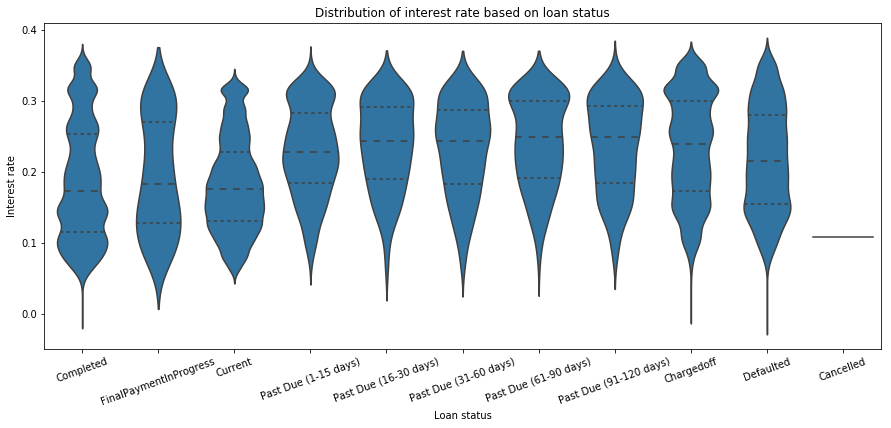

In [17]:
base_color= sb.color_palette()[0]
loan_status_order= ['Completed', 'FinalPaymentInProgress', 'Current', 'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Chargedoff', 'Defaulted', 'Cancelled']
plt.figure(figsize= [15, 6])
sb.violinplot(data= df, x= 'LoanStatus', y= 'BorrowerRate', color= base_color, inner= 'quartile', order= loan_status_order);
plt.xticks(rotation= 20);
plt.xlabel('Loan status');
plt.ylabel('Interest rate');
plt.title('Distribution of interest rate based on loan status');

## 4. Mean of loan amount vs. Income range and Employment status

This bar chart demonstrates how income range and employment status together can influence the average amount of loans lent to all applicants. The average loan amount shows an upward trend as we move from retired to employed and from low-income to high-income applicants. The nature of 'Other' employment status is not clear but it probably refers to contractors who work for an amployer. It is interesting that retired applicants whose income is more than \\$100,000 borrowed less amount of loan on average compared to those of lower income ranges. 

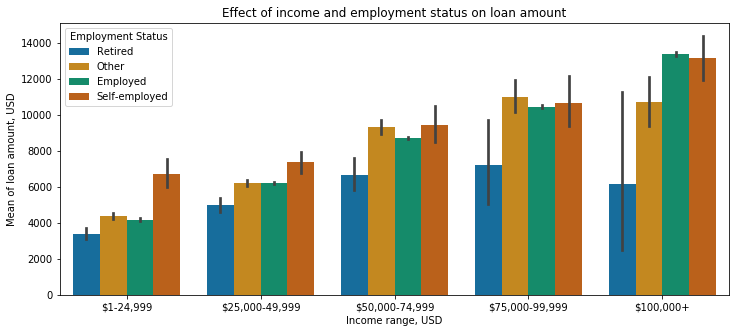

In [21]:
income_range_order= ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
employ_order= ['Retired', 'Other', 'Employed', 'Self-employed']
df_mod= df.query('EmploymentStatus != "Not employed" and IncomeRange != "Not employed"')
plt.figure(figsize= [12,5])
ax= sb.barplot(data= df_mod, x= 'IncomeRange', y= 'LoanOriginalAmount', hue= 'EmploymentStatus', order= income_range_order, hue_order= employ_order, palette= 'colorblind')
plt.ylabel('Mean of loan amount, USD');
plt.xlabel('Income range, USD');
plt.title('Effect of income and employment status on loan amount');
plt.legend(title= 'Employment Status');

## 5. Mean of Interest rate vs. Income range and Loan term

As we would expect, the barchat shows that the largest average interest rates belong to loans of 60 months duration followed by 36 and 12 months loans. This is because longer term economic conditions are much harder to predict thus lenders charge higher interest rates for longer term loans. Moreover, it is clearly shown that low-income people have to pay more interest on their loans as higher risk is associated with their payment compared to high-income applicants.

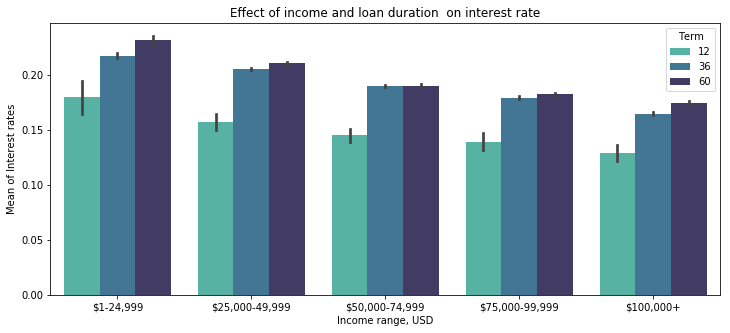

In [22]:
term_order= [12, 36, 60]
df_mod= df.query('EmploymentStatus != "Not employed" and IncomeRange != "Not employed"')
plt.figure(figsize= [12,5])
ax= sb.barplot(data= df_mod, x= 'IncomeRange', y= 'BorrowerRate', hue= 'Term', order= income_range_order, hue_order= term_order, palette= 'mako_r')
plt.ylabel('Mean of Interest rates');
plt.xlabel('Income range, USD');
plt.title('Effect of income and loan duration  on interest rate');
#plt.legend(title= 'Loan term', labels= ['12 months', '36 months', '60 months'], markerscale= 20);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!